This notebook is based on the one found here:

https://colab.research.google.com/drive/1ati-phGZWzeX3_Zvy1xgNtcc6PpXgdXk#scrollTo=bon_IYbzq0vz

## Create image captioning dataset

In [200]:
from datasets import load_dataset
import os

dataset = load_dataset("dataset/dataset_loading_script.py", data_dir=os.path.abspath("./dataset"), trust_remote_code=True)

In [201]:
dataset.column_names

{'train': ['file_name', 'text', 'image'],
 'validation': ['file_name', 'text', 'image'],
 'test': ['file_name', 'text', 'image']}

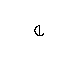

(64, 64)

In [202]:
example = dataset['train'][6]
image = example["image"]
width, height = image.size
display(image)
width, height

In [203]:
example['text']

'G21 ; Set units to millimeters\nG90 ; Absolute positioning\nG1 X3.939 Y3.838 F1200\nG1 X3.885 Y3.830 F1200\nG1 X3.833 Y3.815 F1200\nG1 X3.783 Y3.795 F1200\nG1 X3.735 Y3.770 F1200\nG1 X3.690 Y3.739 F1200\nG1 X3.649 Y3.704 F1200\nG1 X3.611 Y3.665 F1200\nG1 X3.579 Y3.621 F1200\nG1 X3.551 Y3.575 F1200\nG1 X3.528 Y3.526 F1200\nG1 X3.511 Y3.474 F1200\nG1 X3.499 Y3.421 F1200\nG1 X3.494 Y3.367 F1200\nG1 X3.494 Y3.313 F1200\nG1 X3.500 Y3.259 F1200\nG1 X3.512 Y3.206 F1200\nG1 X3.529 Y3.155 F1200\nG1 X3.552 Y3.106 F1200\nG1 X3.580 Y3.059 F1200\nG1 X3.613 Y3.016 F1200\nG1 X3.650 Y2.977 F1200\nG1 X3.692 Y2.942 F1200\nG1 X3.737 Y2.912 F1200\nG1 X3.785 Y2.887 F1200\nG1 X3.835 Y2.867 F1200\nG1 X3.888 Y2.853 F1200\nG1 X3.941 Y2.844 F1200\nG1 X3.995 Y2.841 F1200\nG1 X4.049 Y2.845 F1200\nG1 X4.103 Y2.854 F1200\nG1 X4.155 Y2.868 F1200\nG1 X4.205 Y2.889 F1200\nG1 X4.253 Y2.914 F1200\nG1 X4.298 Y2.945 F1200\nG1 X4.339 Y2.980 F1200\nG1 X4.376 Y3.020 F1200'

## Create PyTorch Dataset

In [212]:
from torch.utils.data import Dataset

class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        

        encoding = self.processor(images=item["image"], text=item["text"], padding="max_length", max_length=512, truncation=True, return_tensors="pt")
        # print(encoding)
        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}

        return encoding

In [213]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("microsoft/git-base")

In [214]:
train_dataset = ImageCaptioningDataset(dataset['train'], processor)

test_dataset = ImageCaptioningDataset(dataset['test'], processor)

In [215]:
train_dataset.__getitem__(6)['input_ids']

tensor([  101,  1043, 17465,  1025,  2275,  3197,  2000,  4971, 28136,  1043,
        21057,  1025,  7619, 19120,  1043,  2487,  1060,  2509,  1012,  6109,
         2683,  1061,  2509,  1012,  6640,  2620, 20069, 28332,  1043,  2487,
         1060,  2509,  1012,  6070,  2629,  1061,  2509,  1012,  6640,  2692,
        20069, 28332,  1043,  2487,  1060,  2509,  1012,  6640,  2509,  1061,
         2509,  1012,  6282,  2629, 20069, 28332,  1043,  2487,  1060,  2509,
         1012,  6275,  2509,  1061,  2509,  1012,  6535,  2629, 20069, 28332,
         1043,  2487,  1060,  2509,  1012,  6421,  2629,  1061,  2509,  1012,
        29065, 20069, 28332,  1043,  2487,  1060,  2509,  1012, 28066,  1061,
         2509,  1012,  6421,  2683, 20069, 28332,  1043,  2487,  1060,  2509,
         1012,  4185,  2683,  1061,  2509,  1012,  3963,  2549, 20069, 28332,
         1043,  2487,  1060,  2509,  1012,  6079,  2487,  1061,  2509,  1012,
         5764,  2629, 20069, 28332,  1043,  2487,  1060,  2509, 

In [216]:
item = train_dataset[6]
for k in item:
  # print(k,v.shape)
  print(k)

input_ids
attention_mask
pixel_values


## Create PyTorch DataLoader

In [217]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, shuffle=False, batch_size=5)

In [218]:
# batch = next(iter(train_dataloader))
for batch in train_dataloader:
  for k,v in batch.items():
    print(k)
    print(v.shape)

input_ids
torch.Size([5, 512])
attention_mask
torch.Size([5, 512])
pixel_values
torch.Size([5, 3, 224, 224])
input_ids
torch.Size([2, 512])
attention_mask
torch.Size([2, 512])
pixel_values
torch.Size([2, 3, 224, 224])


In [219]:
for k,v in batch.items():
  print(k)
  print(v.shape)

input_ids
torch.Size([2, 512])
attention_mask
torch.Size([2, 512])
pixel_values
torch.Size([2, 3, 224, 224])


In [220]:
processor.decode(batch["input_ids"][1])

'[CLS] g21 ; set units to millimeters g90 ; absolute positioning g1 x3. 939 y3. 838 f1200 g1 x3. 885 y3. 830 f1200 g1 x3. 833 y3. 815 f1200 g1 x3. 783 y3. 795 f1200 g1 x3. 735 y3. 770 f1200 g1 x3. 690 y3. 739 f1200 g1 x3. 649 y3. 704 f1200 g1 x3. 611 y3. 665 f1200 g1 x3. 579 y3. 621 f1200 g1 x3. 551 y3. 575 f1200 g1 x3. 528 y3. 526 f1200 g1 x3. 511 y3. 474 f1200 g1 x3. 499 y3. 421 f1200 g1 x3. 494 y3. 367 f1200 g1 x3. 494 y3. 313 f1200 g1 x3. 500 y3. 259 f1200 g1 x3. 512 y3. 206 f1200 g1 x3. 529 y3. 155 f1200 g1 x3. 552 y3. 106 f1200 g1 x3. 580 y3. 059 f1200 g1 x3. 613 y3. 016 f1200 g1 x3. 650 y2. 977 f1200 g1 x3. 692 y2. 942 f1200 g1 x3. 737 y2. 912 f1200 g1 x3. 785 y2. 887 f1200 g1 x3. 835 y2. 867 f1200 g1 x3. 888 y2. 853 f1200 g1 x3. 941 y2. 844 f1200 g1 x3. 995 y2. 841 f1200 g1 x4. 049 y2. 845 f1200 g1 x4. 103 y2. 854 f1200 g1 x4. 155 y2. 868 f1200 g1 x4. 205 y2. 889 f1200 g1 x4. 253 y2. 914 f1200 g1 x4. 298 y2. 945 f1200 g1 x4. 339 y2. 980 f1200 g1 x4. 376 y3. 020 f1 [SEP]'

We can "denormalize" the pixel values to get back an image:

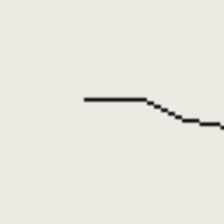

In [221]:
from PIL import Image
import numpy as np

MEAN = np.array([123.675, 116.280, 103.530]) / 255
STD = np.array([58.395, 57.120, 57.375]) / 255

unnormalized_image = (batch["pixel_values"][0].numpy() * np.array(STD)[:, None, None]) + np.array(MEAN)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
Image.fromarray(unnormalized_image)

## Define model

https://huggingface.co/models?other=git

In [222]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("microsoft/git-base")

## Dummy forward pass

In [223]:
outputs = model(input_ids=batch["input_ids"],
                attention_mask=batch["attention_mask"],
                pixel_values=batch["pixel_values"],
                labels=batch["input_ids"])
outputs.loss

tensor(8.7084, grad_fn=<NllLossBackward0>)

## Train the model

In [224]:
import torch

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()

for epoch in range(50):
  print("Epoch:", epoch)
  for idx, batch in enumerate(train_dataloader):
    input_ids = batch.pop("input_ids").to(device)
    pixel_values = batch.pop("pixel_values").to(device)

    outputs = model(input_ids=input_ids,
                    pixel_values=pixel_values,
                    labels=input_ids)

    loss = outputs.loss

    print("Loss:", loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

Epoch: 0
Loss: 9.767441749572754
Loss: 7.033280849456787
Epoch: 1
Loss: 7.953902244567871
Loss: 5.828039646148682
Epoch: 2
Loss: 7.273092746734619
Loss: 5.1944684982299805
Epoch: 3
Loss: 6.894998550415039
Loss: 4.829487323760986
Epoch: 4
Loss: 6.566226005554199
Loss: 4.605932235717773
Epoch: 5
Loss: 6.294013977050781
Loss: 4.376321315765381
Epoch: 6
Loss: 6.054511547088623
Loss: 4.190847396850586
Epoch: 7
Loss: 5.875650882720947
Loss: 4.033324718475342
Epoch: 8
Loss: 5.69215202331543
Loss: 3.912658214569092
Epoch: 9
Loss: 5.536532878875732
Loss: 3.785839557647705
Epoch: 10
Loss: 5.376466751098633
Loss: 3.661569356918335
Epoch: 11
Loss: 5.230008602142334
Loss: 3.5593068599700928
Epoch: 12
Loss: 5.079276084899902
Loss: 3.462568998336792
Epoch: 13
Loss: 4.936217308044434
Loss: 3.339724063873291
Epoch: 14
Loss: 4.7989888191223145
Loss: 3.2390661239624023
Epoch: 15
Loss: 4.661665916442871
Loss: 3.1433417797088623
Epoch: 16
Loss: 4.519337177276611
Loss: 3.0266098976135254
Epoch: 17
Loss: 4.3

## Inference

In [225]:
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=2)

In [226]:
batch = next(iter(test_dataloader))
for k,v in batch.items():
  print(k,v.shape)

input_ids torch.Size([2, 512])
attention_mask torch.Size([2, 512])
pixel_values torch.Size([2, 3, 224, 224])


In [227]:
test_dataloader

In [234]:
data_iter = iter(test_dataloader)
first_batch = next(data_iter)
first_example = first_batch['pixel_values'][0]  # Adjust indexing based on how your data is structured



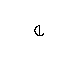

In [239]:
# load image
example = test_dataset[0]
width, height = image.size
display(image)


In [229]:
# prepare image for the model
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

g21 ; set units to millimeters g90 ; absolute positioning g1 x3. 939 y3. 838 f1200 g1 x3. 835 y3. 830 f1200 g1 x3. 833 y
